<a href="https://colab.research.google.com/github/BeeramVineethReddy/Geno_Intern/blob/master/getting_json_and_reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import cv2

from matplotlib import pyplot as plt

import numpy as np

import os

files = [f for f in os.listdir('.') if os.path.isfile(f)]

files

['x29y60.png',
 'x34y14.png',
 'x32y17.png',
 'x28y58.png',
 'x46y16.png',
 'x30y56.png',
 'x42y30.png',
 'x49y23.png',
 'x27y51.png',
 'x43y15.png',
 'x50y21.png',
 'x46y31.png']

In [65]:
def DFS(arr,visited,tmp,i,j,r,c):
  tmp.append([i,j])
  visited[i][j]=True
  if(j-1 in range(0,c) and visited[i][j-1]==False and arr[i][j-1]!=0):
    DFS(arr,visited,tmp,i,j-1,r,c)
  if(j+1 in range(0,c) and visited[i][j+1]==False and arr[i][j+1]!=0):
    DFS(arr,visited,tmp,i,j+1,r,c)
  if(i-1 in range(0,r) and visited[i-1][j]==False and arr[i-1][j]!=0):
    DFS(arr,visited,tmp,i-1,j,r,c)
  if(i+1 in range(0,r) and visited[i+1][j]==False and arr[i+1][j]!=0):
    DFS(arr,visited,tmp,i+1,j,r,c)
  
  if(j-1 in range(0,c) and i+1 in range(0,r) and visited[i+1][j-1]==False and arr[i+1][j-1]!=0):
    DFS(arr,visited,tmp,i+1,j-1,r,c)
  if(j-1 in range(0,c) and i-1 in range(0,r) and visited[i-1][j-1]==False and arr[i-1][j-1]!=0):
    DFS(arr,visited,tmp,i-1,j-1,r,c)
  if(j+1 in range(0,c) and i+1 in range(0,r) and visited[i+1][j+1]==False and arr[i+1][j+1]!=0):
    DFS(arr,visited,tmp,i+1,j+1,r,c)
  if(j+1 in range(0,c) and i-1 in range(0,r) and visited[i-1][j+1]==False and arr[i-1][j+1]!=0):
    DFS(arr,visited,tmp,i-1,j+1,r,c)




def get_json_object(path):
  img = cv2.imread(path)
  edges = cv2.Canny(img,1,10)
  arr = np.array(edges)
  #print(arr)
  shape = np.shape(arr)
  #print(shape)
  row, col = shape[0],shape[1]
  visited = [[False for x in range(col)] for y in range(row)]
  ans = []
  for i in range(row):
    for j in range(col):
      if visited[i][j]==False:
        if(arr[i][j]!=0):
          t=[]
          DFS(arr,visited,t,i,j,row,col)
          ans.append(t)
        else:
          visited[i][j]=True
  json = {} #dictonary

  json["elements"] = []
  for lst in ans:
    json["elements"].append( { "pixel": lst })
  json["name"] = path
  json["position"] = []
  json["position"].append(path[1:path.index('y')])
  json["position"].append(path[path.index('y')+1:path.index('.')])
  return json

x29y60.png


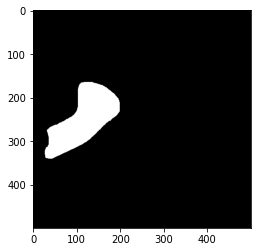

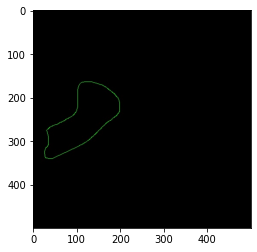

x34y14.png


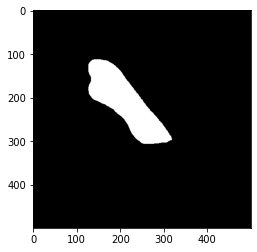

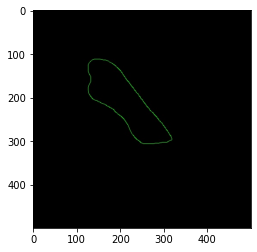

x32y17.png


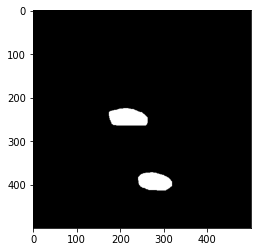

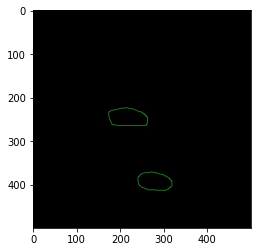

x28y58.png


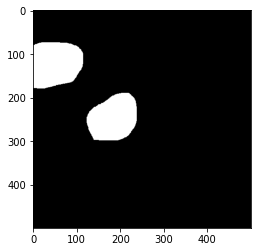

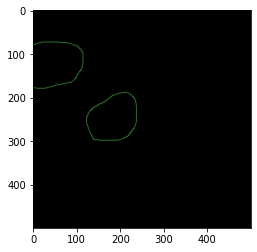

x46y16.png


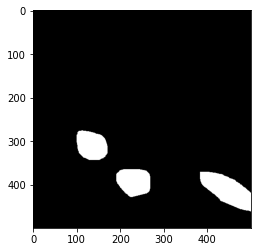

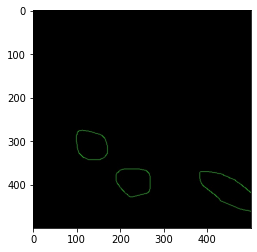

x30y56.png


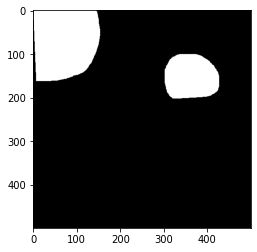

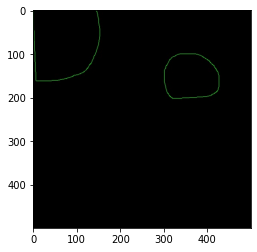

x42y30.png


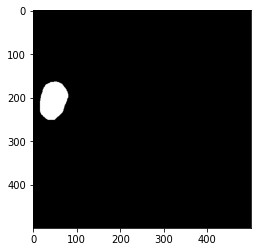

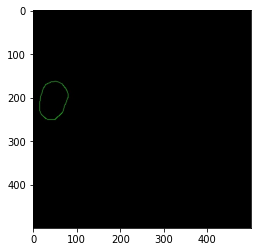

x49y23.png


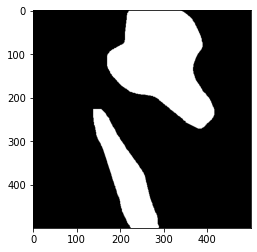

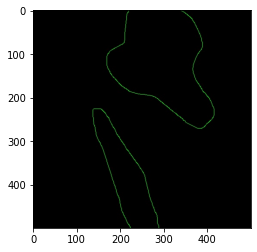

x27y51.png


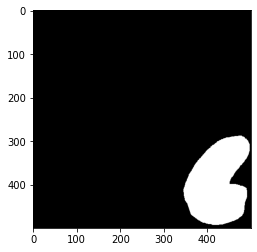

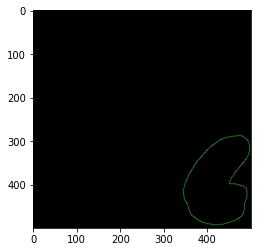

x43y15.png


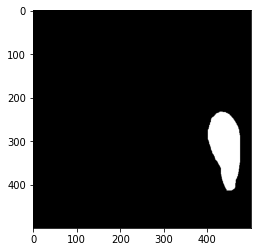

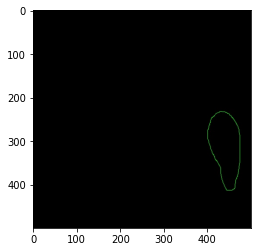

x50y21.png


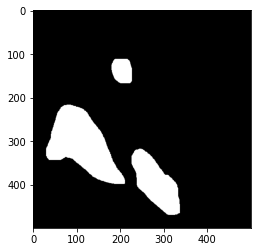

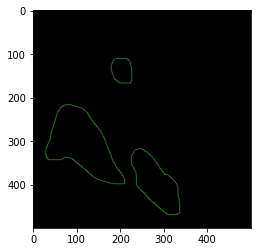

x46y31.png


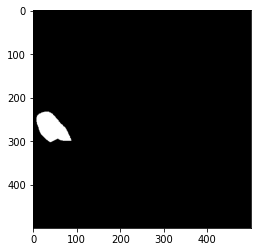

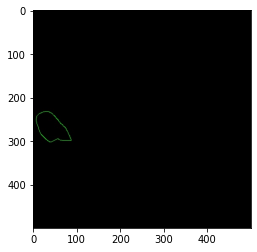

In [68]:
ans = []
for f in files:
  d = get_json_object(str(f))
  img = cv2.imread(str(f))
  arr = np.array(img)
  shape = np.shape(arr)
  recon = np.zeros((shape[0],shape[1],3))
  for each in d["elements"]:
    for pt in each["pixel"]:
      recon[pt[0]][pt[1]] = [0,256,0]
  print(str(f))
  plt.imshow(img)
  plt.show()
  cv2.imwrite('img.jpg', recon)
  img1 = cv2.imread("img.jpg")
  plt.imshow(img1)
  plt.show()
  ans.append(d)

In [69]:
len(ans)

12